# Customer Churn Prediction Project

### The objective of this project is to develop a model that predicts customer churn. 
### The app allows business users to input customer attributes and instantly receive a prediction on whether the customer is likely to stay or leave (churn).

# Load the data

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\hp\Downloads\Churn_Modelling.csv")
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4385,4386,15605375,Tseng,651,France,Male,35,2,86911.8,1,1,0,174094.24,0
9376,9377,15657306,Kershaw,567,France,Female,47,2,0.0,1,0,0,110900.43,1
6664,6665,15667632,Birdseye,703,France,Female,42,7,0.0,2,0,1,72500.68,0
2006,2007,15745543,Hughes,687,France,Male,39,7,0.0,2,1,0,26848.25,0
6490,6491,15620751,Secombe,760,France,Male,34,2,0.0,2,1,0,164162.44,0


In [3]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Preprocessing in the data

In [4]:
# drop unnecessary columns

data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'],inplace = True)

In [5]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#check null data 
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:

# Get minimum values for each column
min_values = data.min()

# Get maximum values for each column
max_values = data.max()

print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

# this will help us when we will deploy our model for the user input data

Minimum values:
 CreditScore           350
Geography          France
Gender             Female
Age                    18
Tenure                  0
Balance               0.0
NumOfProducts           1
HasCrCard               0
IsActiveMember          0
EstimatedSalary     11.58
Exited                  0
dtype: object

Maximum values:
 CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
Exited                     1
dtype: object


# Data Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

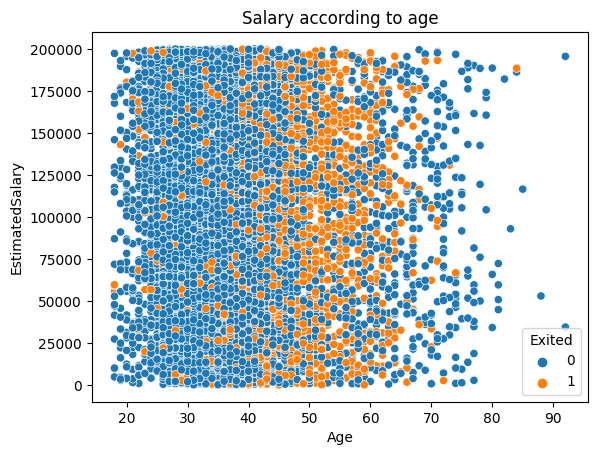

In [9]:
sns.scatterplot(data=data, x='Age',y='EstimatedSalary',hue='Exited')
plt.title("Salary according to age")
plt.plot()

Text(0.5, 1.0, 'Churn vs Stay by city ')

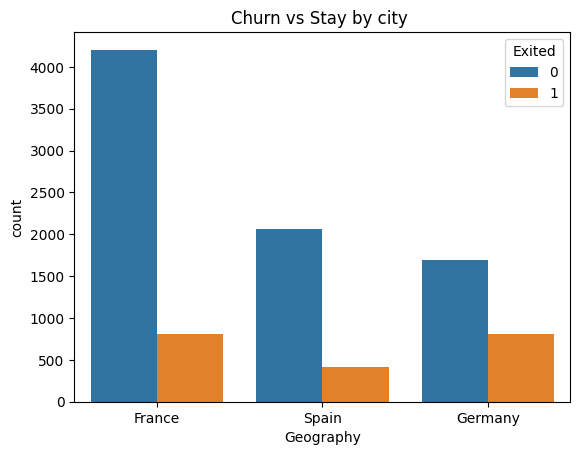

In [10]:
sns.countplot(x='Geography',data=data,hue='Exited') 
plt.title("Churn vs Stay by city ")

## 0 means - customer has stayed with company
## 1 means - customer leave the company

Text(0.5, 1.0, 'Count of Churn vs Stay ')

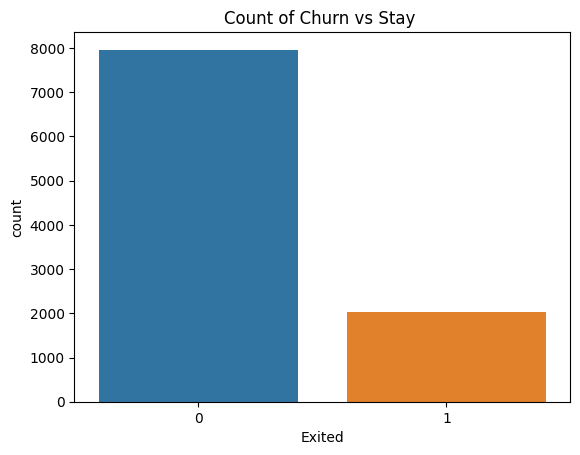

In [11]:
sns.countplot(x='Exited', data=data)
plt.title("Count of Churn vs Stay ")

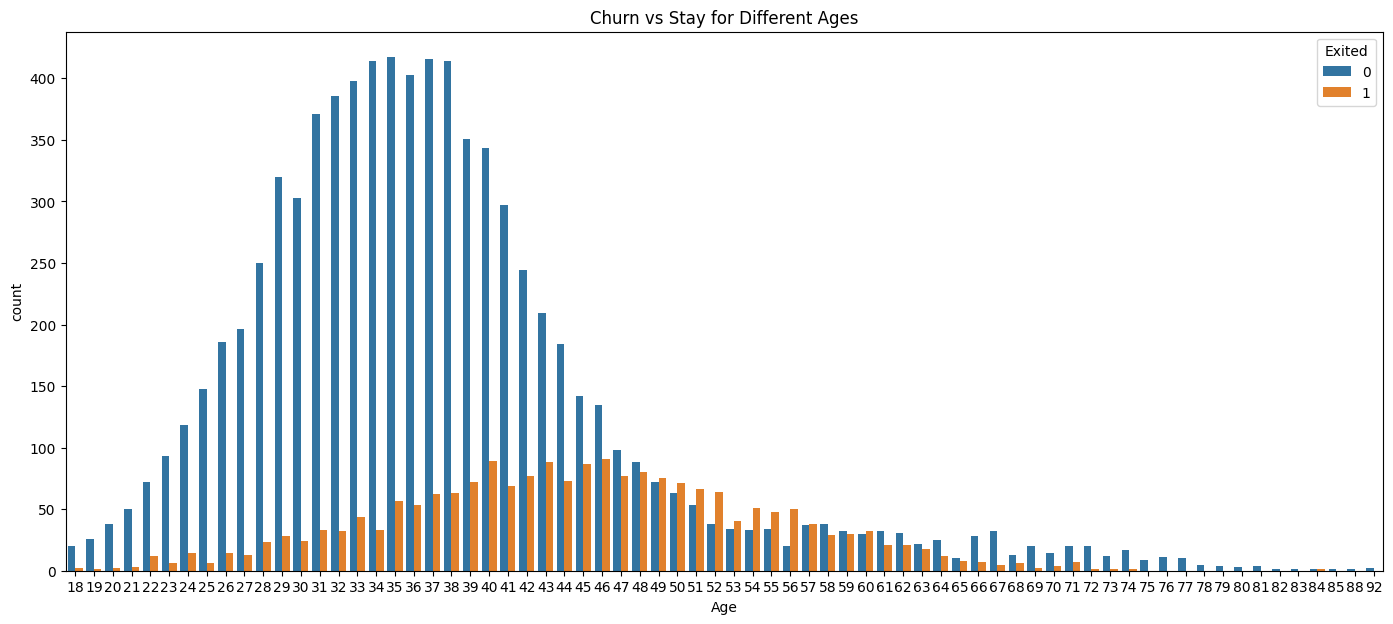

In [12]:
plt.figure(figsize=(17,7))

sns.countplot(x='Age', hue='Exited', data=data)
plt.title('Churn vs Stay for Different Ages')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_3108\2964990864.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Exited']==0]['Age'],hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\AppData\Local\Temp\ipykernel_3108\2964990864.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fun

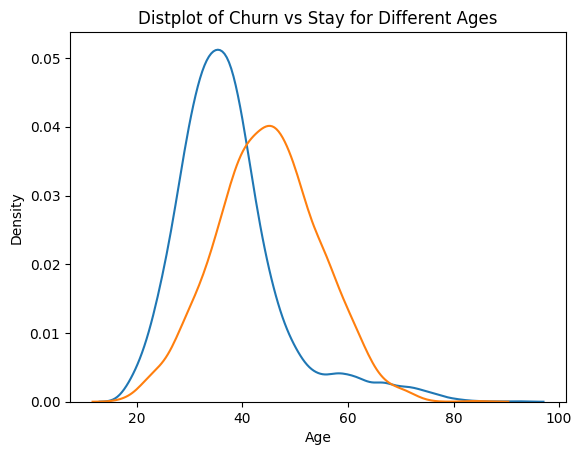

In [13]:
#plt.figure(figsize=(17,7))

#sns.distplot(data['Age'],hist=False)
sns.distplot(data[data['Exited']==0]['Age'],hist=False)
sns.distplot(data[data['Exited']==1]['Age'],hist=False)
plt.title('Distplot of Churn vs Stay for Different Ages')
plt.show()


# Check Outliers

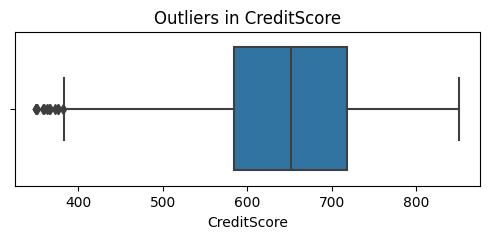

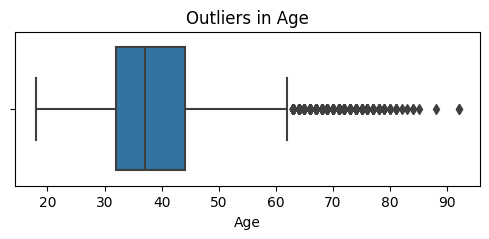

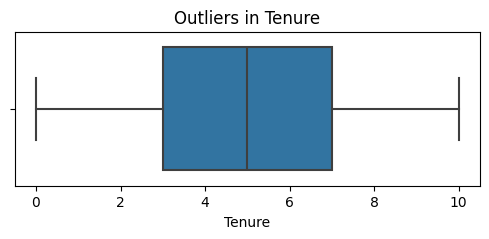

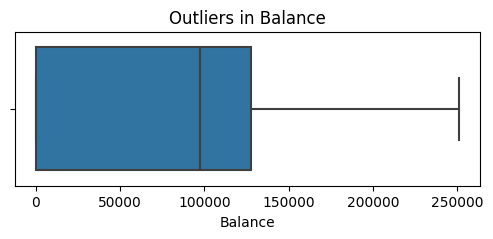

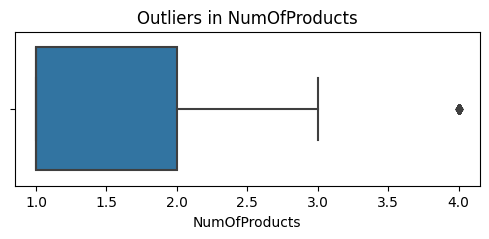

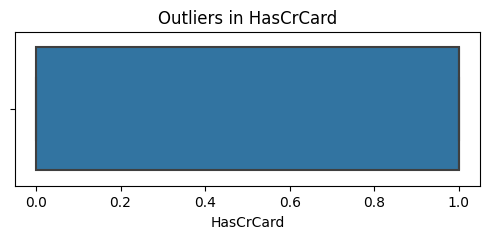

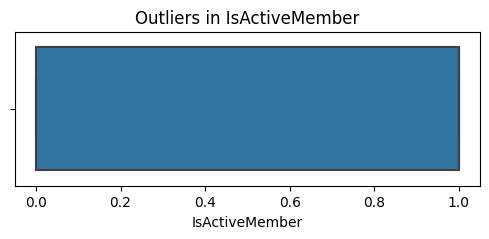

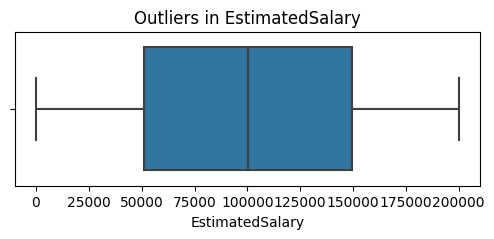

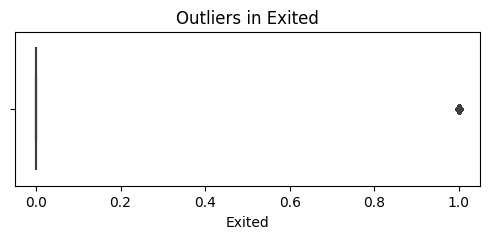

In [14]:
column = ['CreditScore', 'Age', 'Tenure', 'Balance',
'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

for i in column:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=data[i])
    plt.title(f"Outliers in {i}")
    plt.show()

# Encoding

In [15]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [16]:
# encoding in geography
data = pd.get_dummies(data, columns=['Geography'], drop_first=True, dtype=int)


In [17]:
# encoding in gender
data['Gender'] = data['Gender'].map({'Female':0, 'Male':1})

In [18]:
data.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0


# Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# we don't need to do scaling in other columns bcoz their data in already in 0 and 1 

ss = StandardScaler()
scale_data = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
data[scale_data] = ss.fit_transform(data[scale_data])


In [21]:
data.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0


# Split the data in x and Y

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = data.drop('Exited',axis=1)
y = data['Exited']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)

# Apply ML Algorithm & Train the data 

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Predict Testing data

In [27]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Check Accuracy

In [28]:
model.score(x_test,y_test)*100

81.15

In [29]:
model.score(x_train,y_train)*100

81.0875

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8115


# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1544   63]
 [ 314   79]]


# Calculate f1, recall &  precision score

In [32]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [33]:
f1 = f1_score(y_test,y_pred)
print("f1_score is :",f1)

recall = recall_score(y_test,y_pred)
print("recall score is:", recall)

precision = precision_score(y_test, y_pred)
print("precision score is:",precision)

f1_score is : 0.2953271028037383
recall score is: 0.2010178117048346
precision score is: 0.5563380281690141


### So as we are seeing that our data accuracy is not too much good and f1 score is also very low .
### Main problem is that model is missing too much Churn customers and it's detecting only 20% churn and it's missing 314 cases.
### We need to improve it so we are going to use some other techniques.

# Use xgboost algorithm 
- to increase the model accuracy.

In [34]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
from xgboost import XGBClassifier

In [36]:
Model = XGBClassifier(random_state=42)  
Model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
y_pred = Model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 86.95


# Use GridSearchCV

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'criterion': ['gini', 'entropy']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}


In [40]:
grid_search.score(x_test,y_test)*100

86.4

# Use Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# 5-fold cross validation
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-validation scores: [0.8575 0.8695 0.8605 0.8675 0.8595]
Average Accuracy: 0.8629000000000001


## Here we got accuracy Respectively after using Xgboost, Gridsearch and Cross validation 86.9, 86.5 and 86.3 so 
## we are going to choose Xgboost algorithm.

# Predict the testing data

In [42]:
y_pred2 = Model.predict(x_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 1])

# Confusion Matrix

In [43]:
cm2 = confusion_matrix(y_test,y_pred2)
print("Confusion matrix:\n",cm2)

Confusion matrix:
 [[1521   86]
 [ 175  218]]


# Calculate f1, recall &  precision score

In [44]:
f1 = f1_score(y_test,y_pred2)
print("f1_score is :",f1)

recall = recall_score(y_test,y_pred2)
print("recall score is:", recall)

precision = precision_score(y_test, y_pred2)
print("precision score is:",precision)

f1_score is : 0.6255380200860832
recall score is: 0.55470737913486
precision score is: 0.7171052631578947


## Now we got good accuracy and good f1, recall, precision score so now our model is good to predict the churn or stay 

# Predict the user data 

In [45]:

# 8894	15612670	Berry	631	Spain	Female	46	10	0.00	2	1	1	129508.96	


In [46]:
# we have to give columns name that we gave in the training 

In [47]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [48]:
features_name = ['CreditScore','Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [49]:
user_data = pd.DataFrame([[8894,'Spain','Female', 46, 10, 0.00, 2, 1, 1, 129508.96]],columns = features_name)
user_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,8894,Spain,Female,46,10,0.0,2,1,1,129508.96


In [50]:
# encoding in geography
user_data['Geography'] = user_data['Geography'].map({'Spain':0})

In [51]:
# encoding in gender
user_data['Gender'] = user_data['Gender'].map({'Female':1})

In [52]:
#scaling 
user_data[scale_data] = ss.fit_transform(user_data[scale_data])

In [53]:
expected_columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_Germany', 'Geography_Spain']

In [54]:
for col in expected_columns:
    if col not in user_data.columns:
        user_data[col] = 0  # jahan data nahi mila wahan 0

In [55]:
user_data = user_data[expected_columns]

In [56]:
Model.predict(user_data)

array([0])

## 0 means our model is predictiong that customer has stayed with company .

# Save The Model

In [59]:
import pickle

In [60]:
# save the model 
with open('Customer_churn_model.pkl','wb') as file:
    pickle.dump(Model, file)


In [61]:
import pickle
# Save your scaler
pickle.dump(ss, open('scaler.pkl', 'wb'))

In [62]:
import os; os.getcwd()


'C:\\Users\\hp\\Documents'

# Thank You !